In [1]:
# using TA-Lib
# http://mrjbq7.github.io/ta-lib/install.html

# copy from Pythonで簡単なモメンタム投資モデルを作る http://qiita.com/sawadybomb/items/9dc9d858aa399c8b4011
# GUI manual https://media.readthedocs.org/pdf/jons-widgets-fork/nicedocs/jons-widgets-fork.pdf

In [16]:
%matplotlib inline
from database import DB
import datetime as dt
import sqlite3
import pandas.io.sql as psql
import pandas as pd
import numpy as np
import talib as ta
import matplotlib.pyplot as plt
import pandas.tseries.offsets as offsets
import ipywidgets as widgets
from IPython.display import display

ModuleNotFoundError: No module named 'talib'

In [3]:
conn = sqlite3.connect("brand.sqlite3")
brand_list = psql.read_sql('select * from brand_list where market = "マザーズ"',conn)

In [4]:
codes = {}
for row in brand_list.values:
    codes[row[2].replace('(株)','')] = row[0]

6038
code_6038: The table found
code_6038: Getting additional datas
Failed: code_6038: Cannot get additonal stock datas from server


/home/ogawara/anaconda3/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file /home/ogawara/anaconda3/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


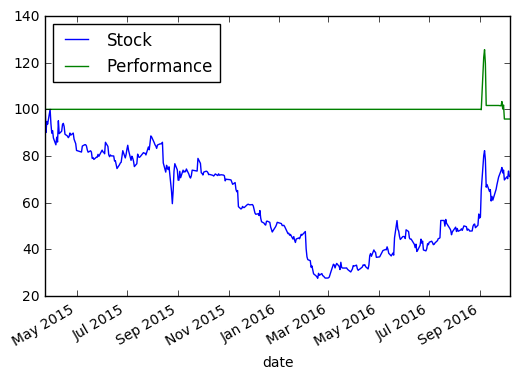

3930
code_3930: The table found
code_3930: Getting additional datas
Failed: code_3930: Cannot get additonal stock datas from server


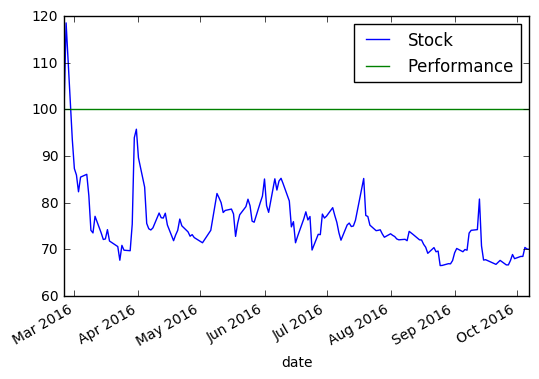

6086
code_6086: The table found
code_6086: Getting additional datas
Failed: code_6086: Cannot get additonal stock datas from server


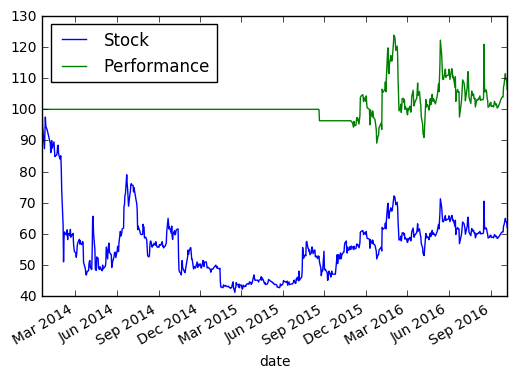

In [5]:
w = widgets.Dropdown(
    options = codes,
    values=1433,
    description='銘柄：'
)
display(w)

data = pd.DataFrame()

def read_data():
    print(w.value)
    global data
    code = w.value
    db = DB(code)
    data = db.read()
    
def momentum_plot():
    global data
    momentum = ta.MOM(data['close'].astype(np.float64).values,250)

    length = len(data.index)
    cash = [None for row in range(length)]
    position = [None for row in range(length)]
    asset = [None for row in range(length)]

    cash[0] = 100000
    position[0] = 0

    for i, (index, row) in enumerate(data.iterrows()):
        if i > 0:
            cash[i] = cash[i-1]
            position[i] = position[i-1]
            
            if momentum[i] > 0 and momentum[i-1] < 0:
                amount = cash[i] // row['close']
                position[i] += amount
                cash[i] -= amount * row['close'] + 150
            
            elif momentum[i] < 0 and momentum[i-1] > 0:
                cash[i] += position[i] * row['close'] - 150
                position[i] =0
        asset[i] = cash[i] + position[i] * row['close']
    
    data['asset'] = asset
    
    # plot result
    d2 = pd.DataFrame()
    d2['Stock'] = data['close'] / data['close'][0] * 100
    d2['Performance'] = asset
    d2['Performance'] = d2['Performance'] / asset[0] * 100
    d2 = d2.set_index(pd.to_datetime(data['date']))

    d2.plot()

def merge(b):
    read_data()
    momentum_plot()

button = widgets.Button(description="データ読み込み")
display(button)
button.on_click(merge)

In [15]:
db = DB(3911)
db.read()['close'].astype(np.float64)[0]

1126.0

In [14]:
db = DB(2370)
type(db.read()['close'][0])

numpy.float64

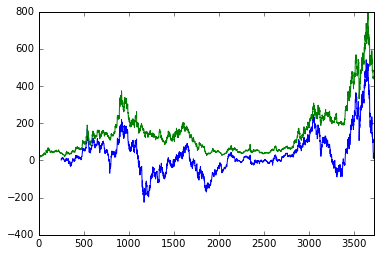

In [47]:
data['momentam'] = ta.MOM(data['close'].values,250)
data['momentam'].plot()
data['close'].plot()